<a href="https://colab.research.google.com/github/NsiriRoua/Regression/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression from sceatch**

We will genrate class named **LinearRegression** by using only **numpy** 



1.   First method : **fit()**, which will estimate **β** parameters, it's simply by calculating :
       **β^=(X⊤ X)^−1 X⊤ y**

also this method will make prediction with : **y^=X β^** 
and calculating the loss function:Squarred error loss
         L(β^)=1/2*sum(yn− y^n)^2 , where n is in [1,N] ,we have N observations
      
2.   Second method: **predict()** Given a test set of predictors **X′**, we can form fitted values with **y^′=X′β^**.





**Import resources**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Let's Define LinearRegression class**

In [ ]:
class LinearRegression:
  def fit(self,X,y,intercept=False):
    #First if the input don't have an intercept we must add it
    if intercept==False:
      ones=np.ones(len(X)).reshape(len(X),1)#Column of ones
      X=np.concatenate((ones,X),axis=1)
      self.X=np.array(X)
      self.y=np.array(y)
      #N observations: number of rows of X  , D features : Number of columns of X
      self.N,self.D=self.X.shape

      #Let's estimate our parameters
      XTX=np.dot(self.X.T,self.X)
      XTX_inverse=np.linalg.inv(XTX)
      XTy=np.dot(self.X.T,self.y)
      self.beta_hats=np.dot(XTX_inverse,XTy)

      #Let's predict
      self.y_hat=np.dot(self.X,self.beta_hats)

      #Let's calculate the loss
      self.loss=0.5*np.sum(self.y-self.y_hat)


      def predict(self,X_test,intercept=True):

        #From Predictions
        self.y_test_hat=np.dot(X_test,self.beta_hats)

    

**Let's try our LinearRegression**

Here we use Boston housing dataset from sklearn.datasets 

In [ ]:
from sklearn import datasets
boston=datasets.load_boston()
X=boston['data']
y=boston['target']



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


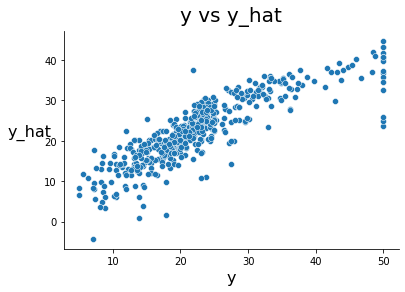

In [ ]:
#Let's instanciate our model
model=LinearRegression()
model.fit(X,y,intercept=False)
#Let's viszualise our model
fig,ax=plt.subplots()
sns.scatterplot(model.y,model.y_hat)
ax.set_xlabel('y',size=16)
ax.set_ylabel('y_hat',rotation=0,size=16,labelpad=15)
ax.set_title('y vs y_hat',size=20,pad=10)
sns.despine()


# **Gradient Descent**

Almost all the models discussed in this book aim to find a set of parameters that minimize a chosen loss function. Sometimes we can find the optimal parameters by taking the derivative of the loss function, setting it equal to 0, and solving. In situations for which no closed-form solution is available, however, we might turn to gradient descent. Gradient descent is an iterative approach to approximating the parameters that minimize a differentiable loss function.



**Linear Algebra**

*Set-Up*



We have N observations,where each observation has predictors xn and target variable yn. We decide to approximate yn with  **y^n=f(xn,β^)**
f()  is some differentiable function and β^ is a set of parameter estimates. Next, we introduce a differentiable loss function L. For simplicity, let’s assume we can write the model’s entire loss as the sum of the individual losses across observations. That is,

                   `    L=∑g(yn,y^n) where n isin [1,N]`
and g() is some differentiable function representing an observation’s individual loss.

To fit this generic model, we want to find the values of β^ that minimize L. We will likely start with the following derivative:

`∂L/∂β^ =∑ ∂g(yn,y^n)/∂β^ =∑ (∂g(yn,y^n)/∂y^n) * (∂y^n/∂β^)wehre n is in [1,N]`

Ideally, we can set the above derivative equal to 0 and solve for β^, giving our optimal solution. If this isn’t possible, we can iteratively search for the values of β^ that minimize L. This is the process of gradient descent.



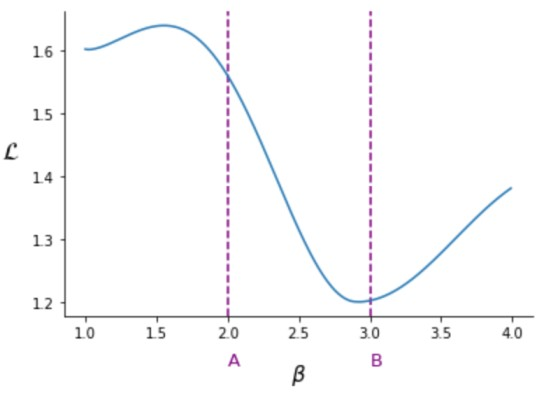

To understand this process intuitively, consider the image above showing a model’s loss as a function of one parameter, β. We start our search for the optimal β by randomly picking a value. Suppose we start with β at point A. From point A we ask “would the loss function decrease if I increased or decreased β”. To answer this question, we calculate the derivative of L with respect to β evaluated at β=A. Since this derivative is negative, we know that increasing β some small amount will decrease the loss.

Now we know we want to increase β, but how much? Intuitively, the more negative the derivative, the more the loss will decrease with an increase in β. So, let’s increase β by an amount proportional to the negative of the derivative. Letting δ be the derivative and η be a small constant learning rate, we might increase β with

β←β−ηδ.
The more negative δ is, the more we increase β.

Now suppose we make the increase and wind up with β=B. Calculating the derivative again, we get a slightly positive number. This tells us that we went too far: increasing β will increase L. However, since the derivative is only slightly positive, we want to only make a slight correction. Let’s again use the same adjustment, β←β−ηδ. Since δ is now slightly positive, β will now decrease slightly. We will repeat this same process a fixed number of times or until β barely changes. And that is gradient descent!



*Steps*

We can describe gradient descent more concretely with the following steps. Note here that β^ can be a vector, rather than just a single parameter.

   1-Choose a small learning rate η

   2-Randomly instantiate β^

   3-For a fixed number of iterations or until some stopping rule is reached:

          a-Calculate δ=∂L/∂β^

          b-Adjust β^ with

                    β^←β^−ηδ.
A potential stopping rule might be a minimum change in the magnitude of β^ or a minimum decrease in the loss function L.



*Exemple*

As a simple example of gradient descent in action, let’s derive the ordinary least squares (OLS) regression estimates. (This problem does have a closed-form solution, but we’ll use gradient descent to demonstrate the approach). As discussed in Chapter 1, linear regression models y^n with

y^n=xnT.β^,
where xn is a vector of predictors appended with a leading 1 and β^ is a vector of coefficients. The OLS loss function is defined with

L(β^)=1/2*(∑ (yn−y^n)^2 ) = 1/2(∑ ( yn−xnTβ^) ^2)
After choosing η and randomly instantiating β^, we iteratively calculate the loss function’s gradient:

 δ=∂L(β^)/∂β^ = −∑(yn−xn⊤β^)⋅ϕ⊤n
and adjust with

β^←β^−ηδ.
This is accomplished with the following code. Note that we can also calculate δ=−X⊤(y−y^), where X is the feature matrix, y is the vector of targets, and y^ is the vector of fitted values.

In [ ]:
import numpy as np

def gradient_descent(X, y, eta = 1e-3, n_iter = 1e4, add_intercept = True):
  #X is a matrix , y is a vector
  #eta learning rate , small
  
  
  ## Add Intercept
  if add_intercept:
    ones = np.ones(X.shape[0]).reshape(-1, 1)
    X = np.concatenate((ones, X), 1)
    
  ## Instantiate
  beta_hat = np.random.randn(X.shape[1])
  
  ## Iterate
  for i in range(int(n_iter)):
    
    ## Calculate Derivative
    yhat = X @ beta_hat
    delta = -X.T @ (y - yhat)
    beta_hat -= delta*eta
    
 

# **Cross Validation**

Several of the models covered in this book require hyperparameters to be chosen exogenously (i.e. before the model is fit). The value of these hyperparameters affects the quality of the model’s fit. So how can we choose these values without fitting a model? The most common answer is cross validation.

Suppose we are deciding between several values of a hyperparameter, resulting in multiple competing models. One way to choose our model would be to split our data into a training set and a validation set, build each model on the training set, and see which performs better on the validation set. By splitting the data into training and validation, we avoid evaluating a model based on its in-sample performance.

The obvious problem with this set-up is that we are comparing the performance of models on just one dataset. Instead, we might choose between competing models with K-fold cross validation, outlined below.

Split the original dataset into K folds or subsets.

For k=1,…,K, treat fold k as the validation set. Train each competing model on the data from the other K−1 folds and evaluate it on the data from the kth.

Select the model with the best average validation performance.

As an example, let’s use cross validation to choose a penalty value for a Ridge regression model, discussed in chapter 2. This model constrains the magnitude of the regression coefficients; the higher the penalty term, the more the coefficients are constrained.

In [ ]:
#Import packages
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston

In [ ]:
#Load Data 
boston=load_boston()
X=boston['data']
y=boston['target']
N=X.shape[0]
#Choose alpha to consider
potential_alphas=[0,1,10]
error_by_alpha=np.zeros(len(potential_alphas))

#Choose the folds 
K=6
indices
